In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense

(224, 224, 3)

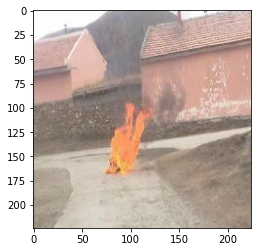

In [5]:
image = plt.imread("./IMG_DATA/Train/Fire/dayroad135.jpg")

plt.imshow(image)

image.shape

In [21]:
image_gen = ImageDataGenerator(rotation_range=20,
                               shear_range=0.2,
                               rescale=1/255,
                               zoom_range=0.2,
                               fill_mode='nearest',
                               width_shift_range=0.1,
                               height_shift_range=0.1)

In [22]:
train_gen = image_gen.flow_from_directory("./IMG_DATA/Train", class_mode="binary", batch_size=16, target_size=(224, 224))

test_gen = image_gen.flow_from_directory("./IMG_DATA/Test", class_mode="binary", batch_size=16, target_size=(224, 224))

Found 8004 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [23]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(4, 4), activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPool2D(pool_size=(3, 3)))

model.add(Conv2D(filters=128, kernel_size=(4, 4), activation="relu"))
model.add(MaxPool2D(pool_size=(3, 3)))

model.add(Conv2D(filters=128, kernel_size=(4, 4), activation="relu"))
model.add(MaxPool2D(pool_size=(3, 3)))

model.add(Flatten())

model.add(Dense(256, activation="relu"))

model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
model.fit(train_gen, epochs=50, steps_per_epoch=150, validation_data=train_gen, validation_steps=12)

Epoch 1/50
150/150 [==============================] - 247s 2s/step - loss: 0.6444 - accuracy: 0.6271 - val_loss: 0.5957 - val_accuracy: 0.6354
Epoch 2/50
150/150 [==============================] - 236s 2s/step - loss: 0.5153 - accuracy: 0.7655 - val_loss: 0.4908 - val_accuracy: 0.7708
Epoch 3/50
150/150 [==============================] - 225s 1s/step - loss: 0.4271 - accuracy: 0.8154 - val_loss: 0.4925 - val_accuracy: 0.8073
Epoch 4/50
150/150 [==============================] - 221s 1s/step - loss: 0.3769 - accuracy: 0.8404 - val_loss: 0.3048 - val_accuracy: 0.8750
Epoch 5/50
150/150 [==============================] - 214s 1s/step - loss: 0.3206 - accuracy: 0.8721 - val_loss: 0.2488 - val_accuracy: 0.8906
Epoch 6/50
150/150 [==============================] - 205s 1s/step - loss: 0.3564 - accuracy: 0.8475 - val_loss: 0.2420 - val_accuracy: 0.9010
Epoch 7/50
150/150 [==============================] - 204s 1s/step - loss: 0.2949 - accuracy: 0.8750 - val_loss: 0.3600 - val_accuracy: 0.8542

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 224, 224, 3)

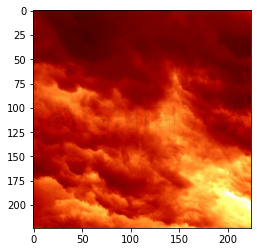

In [85]:
image = load_img("./Non_Fire_Test1.jpg")
image = img_to_array(image)
image = image / image.max()
image = cv2.resize(image, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
plt.imshow(image)
image = np.expand_dims(image, axis=0)
image.shape

In [83]:
predictions = model.predict(image)

if predictions <= 0.5:
    print("Fire")
else:
    print("Not Fire...")

1/1 [==============================] - 0s 38ms/step
Not Fire...


In [64]:
model.save("Fire_Detection(50).h5")